In [147]:
import numpy as np
import matplotlib.pyplot as plt
import random

from landscapes.landscapes import Landscape
from landscapes.modules import Node, UnstableNode, Center, NegCenter
from landscapes.landscape_visuals import *
from landscapes.morphogen_regimes import mr_const, mr_sigmoid, mr_piecewise

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Node: x=-1.5; y=0.0; a=1.5; s=1.
Node: x=1.5; y=0.0; a=2.; s=0.8
UnstableNode: x=0.0; y=1.0; a=1.3; s=0.8
Landscape with modules:
Node: x=-1.5; y=0.0; a=1.5; s=1.,
Node: x=1.5; y=0.0; a=2.; s=0.8,
UnstableNode: x=0.0; y=1.0; a=1.3; s=0.8


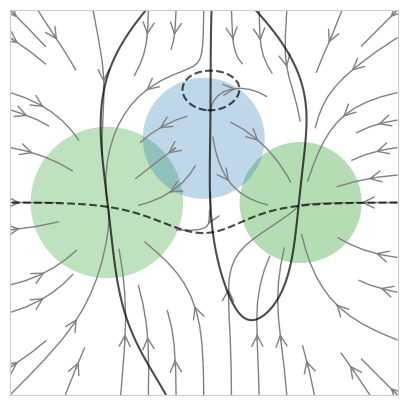

In [2]:
# Landscape with one regime + simple visualization

M1 = Node(x=-1.5, y=0., a=1.5, s=1.)
M2 = Node(x=1.5, y=0., a=2., s=0.8)
M3 = UnstableNode(x=0., y=1., a=1.3, s=0.8)

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.05, regime=mr_const, n_regimes=1)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')


Node: x=-1.5; y=0.0; a=[1.5,2.0]; s=[1.0,0.6]
Node: x=1.5; y=0.0; a=[2.,2.]; s=[0.5,1.2]
UnstableNode: x=0.0; y=1.0; a=[1.3,1.4]; s=[0.8,0.5]
Landscape with modules:
Node: x=-1.5; y=0.0; a=[1.5,2.0]; s=[1.0,0.6],
Node: x=1.5; y=0.0; a=[2.,2.]; s=[0.5,1.2],
UnstableNode: x=0.0; y=1.0; a=[1.3,1.4]; s=[0.8,0.5]


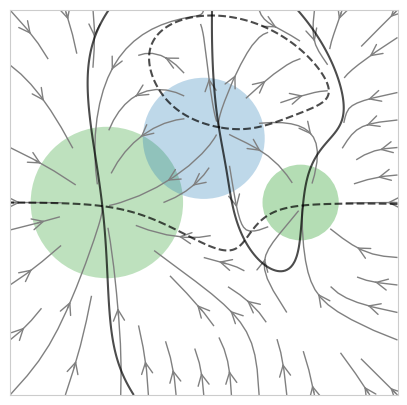

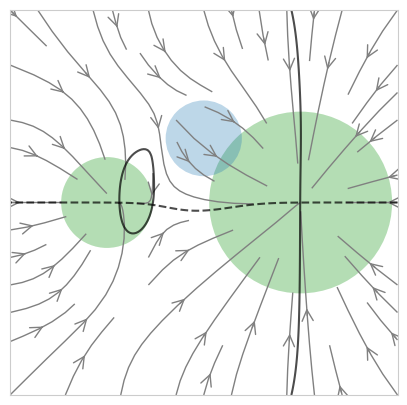

In [3]:
# Landscape with two regimes (piecewise) 

M1 = Node(x=-1.5, y=0., a=(1.5, 2.), s=(1., 0.6))
M2 = Node(x=1.5, y=0., a=(2., 2.), s=(0.5, 1.2))
M3 = UnstableNode(x=0., y=1., a=(1.3, 1.4), s=(0.8, 0.5))

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.005, regime=mr_piecewise, n_regimes=2)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')
fig = visualize_landscape(l, xx, yy, regime=1, color_scheme='fp_types')


Landscape with modules:
Node: x=0.0; y=0.0; a=[1.5,1.5]; s=[2.,2.]; tau=1.0,
UnstableNode: x=0.0; y=0.0; a=[2.,0.]; s=[1.3,1.0]; tau=1.0,
Center: x=0.0; y=0.0; a=[1.,1.]; s=[2.2,2.2]; tau=1.0


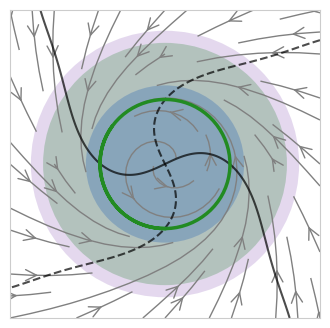

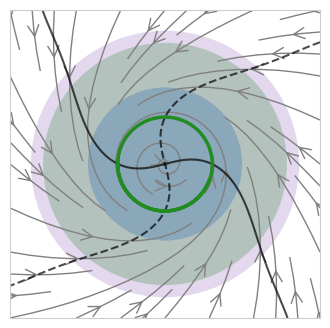

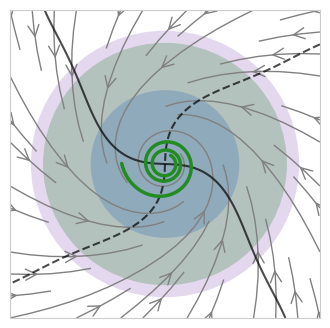

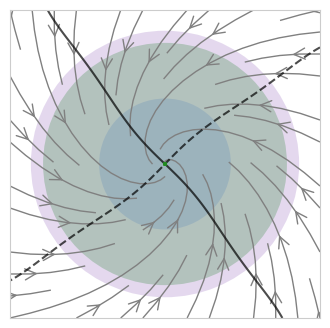

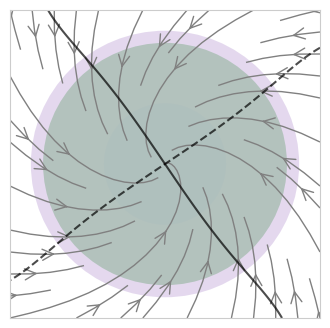

In [4]:
# Landscape with two regimes (sigmoid) + visulization of timepoints with trajectory 
# (Hopf bifurcation)

M1 = Node(0., 0., (1.5, 1.5), (2., 2.), tau=1.)
M2 = UnstableNode(0., 0., (2., 0), (1.3, 1.0), tau=1.)
M3 = Center(0., 0., (1., 1.), (2.2, 2.2), tau=1.)

module_list = [M1, M2, M3]

l = Landscape(module_list, A0 = 0.01, regime=mr_sigmoid, n_regimes=2, morphogen_times=(0.,))
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape_t(l, xx, yy, -5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -2., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=30)
fig = visualize_landscape_t(l, xx, yy, 1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, 5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)



Landscape with modules:
Node: x=0.28392397699629157; y=-2.1769660169060945; a=[2.03815593,1.97222447,0.78028985]; s=[0.53139758,0.85799695,0.94691066],
Node: x=1.5679185059670528; y=-1.8016089446086645; a=[1.49989791,0.60379984,2.82057091]; s=[0.85622159,0.70488526,1.16982467],
Node: x=-1.2991327737663523; y=-1.1490365642768043; a=[2.17319191,2.58455471,1.87408752]; s=[0.72681116,0.73921595,0.88829479],
Node: x=-1.6503665144452804; y=-1.1203277904388274; a=[0.90770893,1.58868379,1.63410978]; s=[1.25464910,0.97179799,0.87103755],
Node: x=0.7831506701323736; y=0.9816403832307667; a=[0.51923084,1.81023752,2.56138747]; s=[1.12192966,0.76997341,1.03565389]


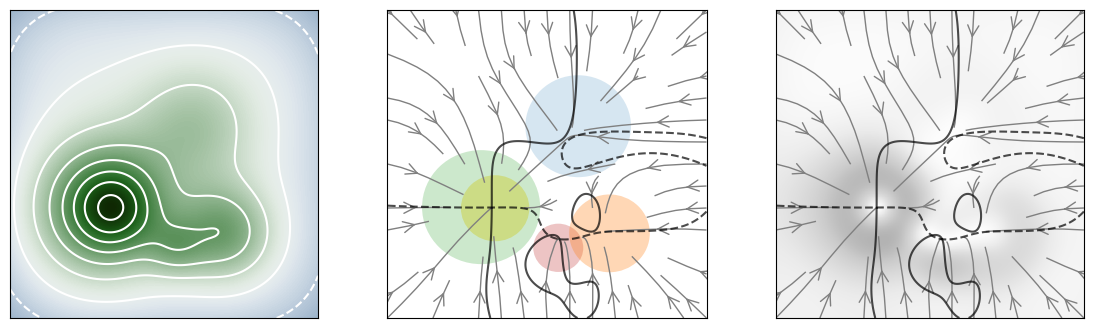

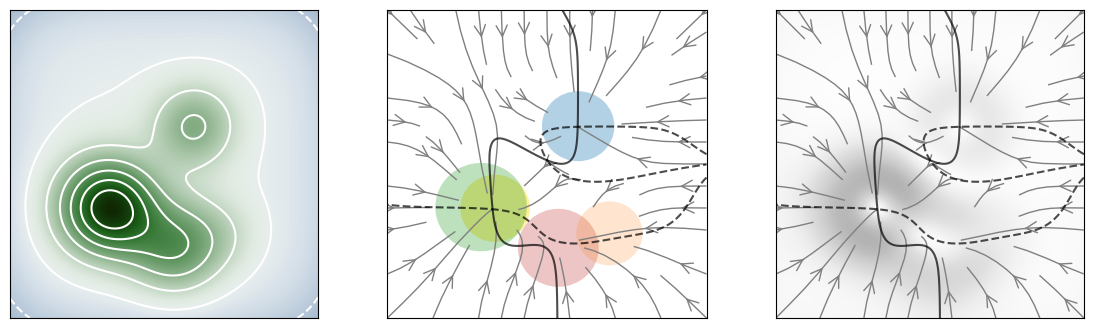

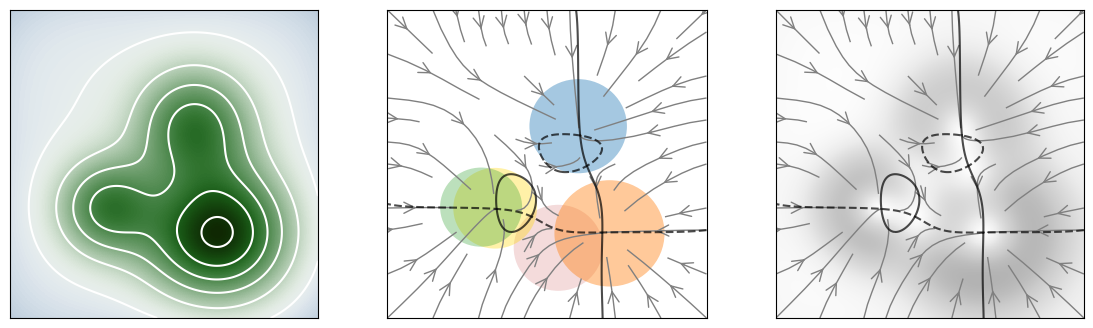

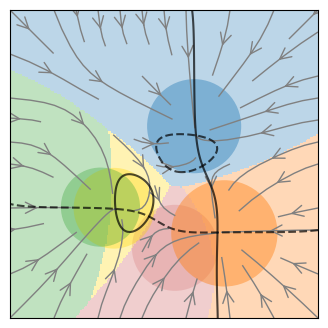

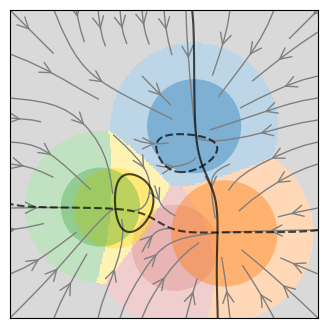

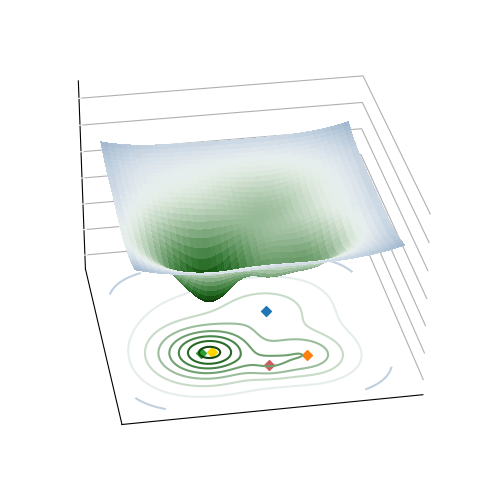

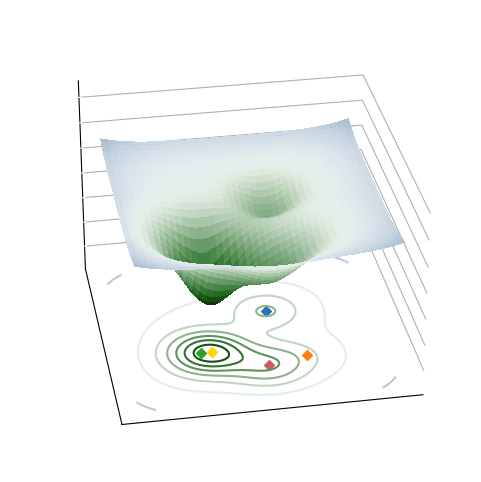

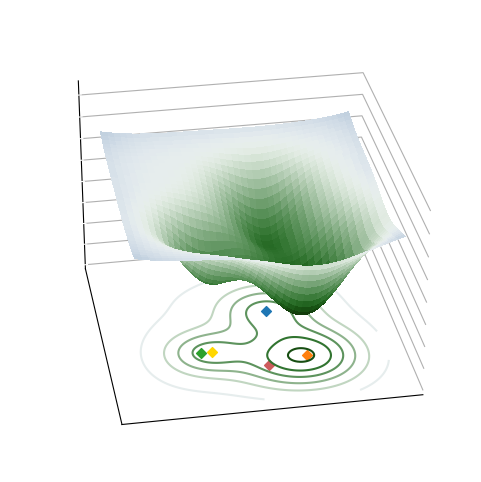

In [157]:
# Random generation of a landscape with node modules (piecewise 3 regimes)
%autoreload
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 3.),
    's': (0.5, 1.5),
}

par_choice_values = {}

used_fp_types = (Node,)
n_modules = 5
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

figures = visualize_all(landscape, xx,yy,times, color_scheme='order', plot_traj=False)

# cell_states = landscape.get_cell_states(6., np.array((xx.flatten(), yy.flatten())), abs_threshold=0.1)
# cmap_state = ListedColormap(['grey',]+list(order_colors))
# norm_state = BoundaryNorm(np.arange(len(order_colors) + 1) - 1.5, cmap_state.N)
# fig = visualize_landscape_t(landscape, xx, yy, 6., color_scheme='order')
# # plt.figure()
# plt.imshow(np.reshape(cell_states, (npoints, npoints)), cmap=cmap_state, norm=norm_state, origin='lower', extent=(-L, L, -L, L), alpha=0.3,
#            interpolation='nearest')
# plt.show()

fig = visualize_cell_states(landscape, xx, yy, 6., 0.)
fig = visualize_cell_states(landscape, xx, yy, 6., 0.1)

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 1, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='order', cmap_center=0., scatter=True)


In [46]:
print(cell_states)

[-1 -1 -1 ... -1 -1 -1]


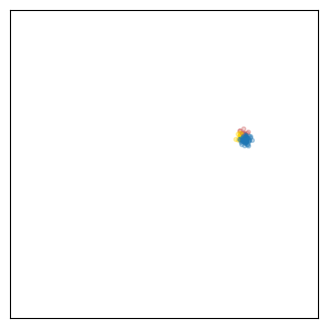

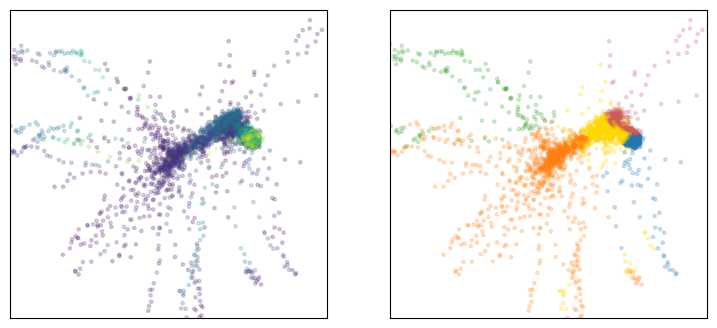

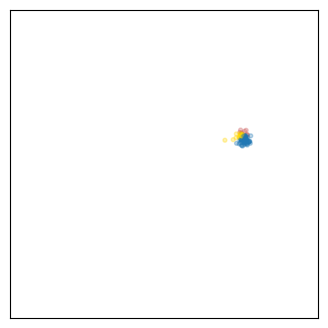

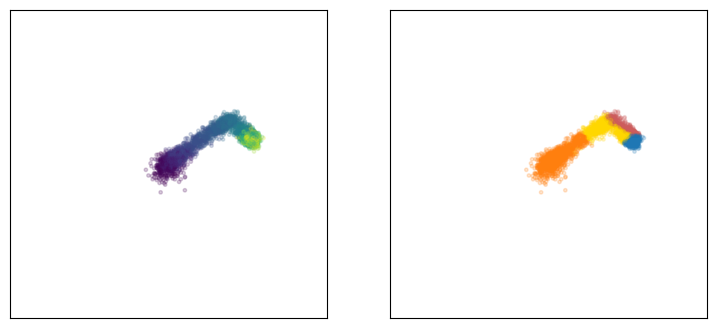

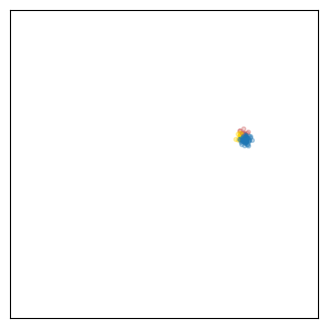

In [3]:
#  Add cells with a scattered initial condition and plot trajectories
n = 100
landscape.init_cells(n, (0., 0.), noise=2.)
get_and_plot_traj(landscape, 0., 10., 51, L, noise=0.2, frozen=False, ndt=50)

# plot final states
plot_cells(landscape, L)

# Cells starting around module i
i = 1
landscape.init_cells(n, i, noise=0.2)
get_and_plot_traj(landscape, 0., 10., 51, L, noise=0.2, frozen=False, ndt=50)

plot_cells(landscape, L)


Landscape with modules:
Center: x=0.9995500360322396; y=-0.9996901452800491; a=[1.24659092,0.85093595,1.54118953]; s=[1.14428031,1.05182736,0.96710214],
UnstableNode: x=0.5075144594703005; y=2.2133827385208846; a=[2.49911140,0.73668212,2.28399946]; s=[1.33204741,1.22074203,1.43055922],
NegCenter: x=2.2821828752919417; y=-0.7705205164237277; a=[1.90985461,0.86862649,1.84442989]; s=[1.49704702,1.12958687,1.12171725],
Center: x=-0.5316374908342496; y=2.4080434942265976; a=[1.53745936,2.80084953,1.86997582]; s=[0.56732921,1.33700216,0.63817665],
UnstableNode: x=0.3987946079103666; y=2.32177711492215; a=[1.69015328,0.87438449,0.63340863]; s=[0.51352616,1.46339498,0.94183502],
UnstableNode: x=2.5770674165441827; y=1.2732123299896907; a=[1.41653018,1.08406940,2.95844421]; s=[0.99832705,1.43912776,1.09514253],
Center: x=0.9023060073832818; y=1.8518100060036708; a=[1.14264447,0.98924973,2.77544598]; s=[1.37201293,1.19827829,1.01764811]


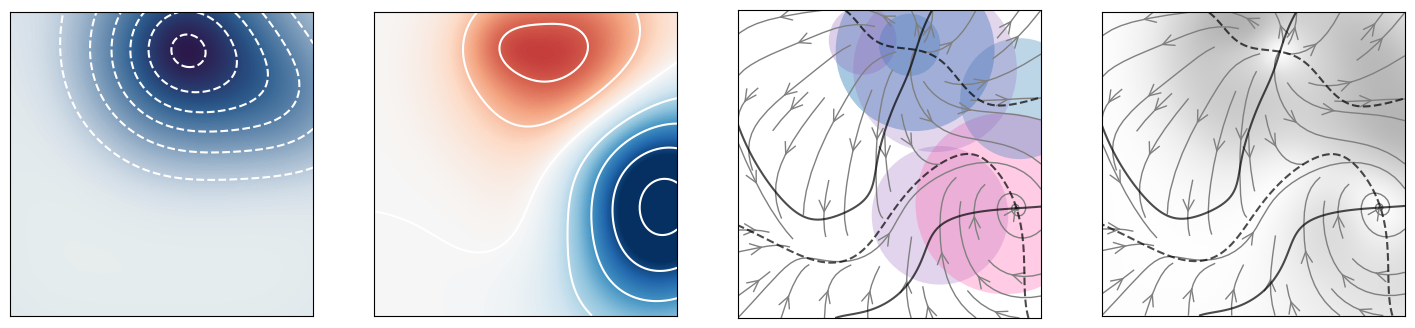

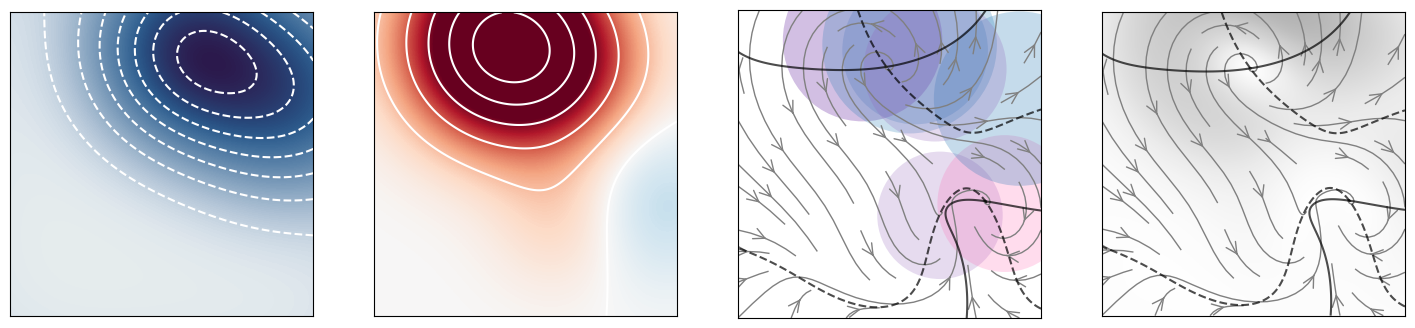

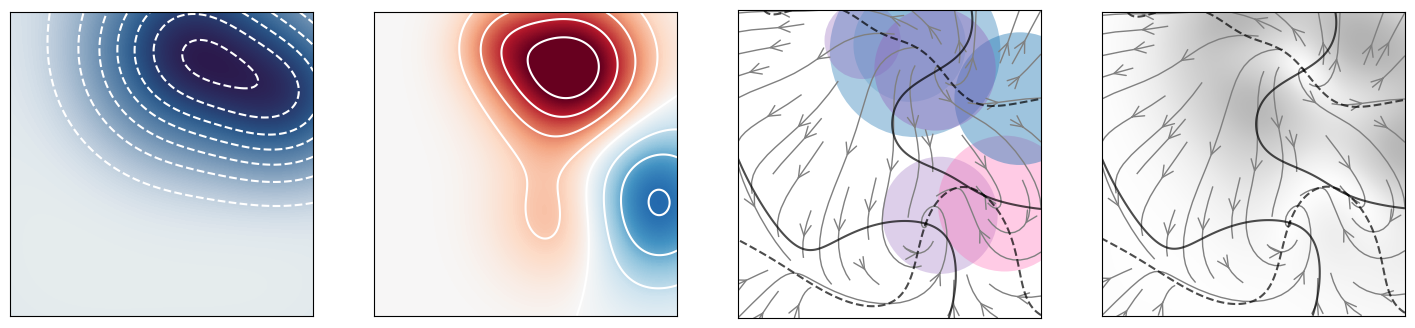

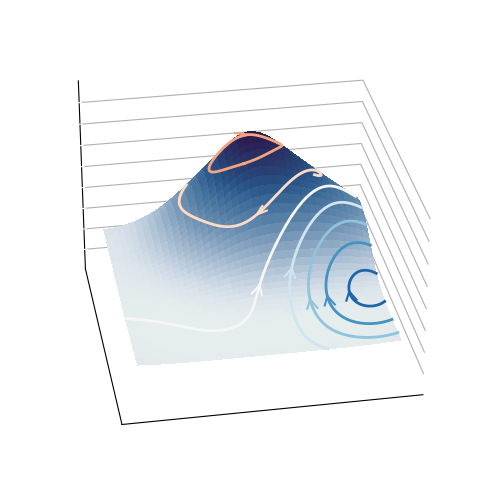

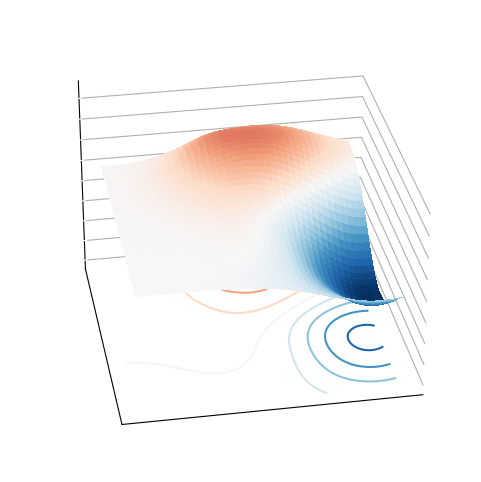

In [140]:
# Random generation of a landscape with gradient and curl modules (piecewise 3 regimes)
%autoreload

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 3.),
    's': (0.5, 1.5),
}

par_choice_values = {}

used_fp_types = (Node, UnstableNode, Center, NegCenter)
n_modules = 7
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

figures = visualize_all(landscape, xx,yy,times, color_scheme='fp_types', plot_traj=False)

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False, rot_contour=True)
fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False, rot=True)
# fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=True)

In [30]:
np.zeros(250).shape

(250,)

Empty landscape


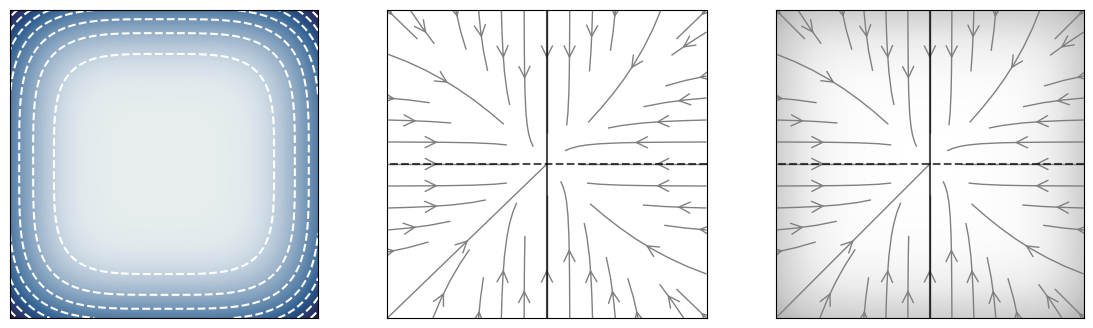

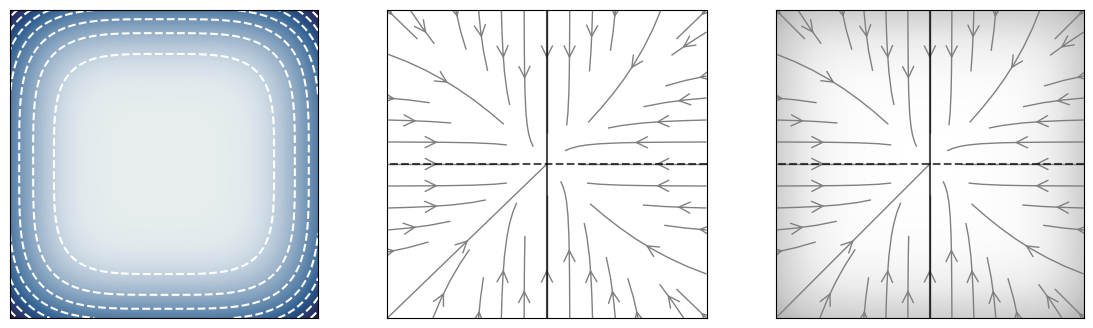

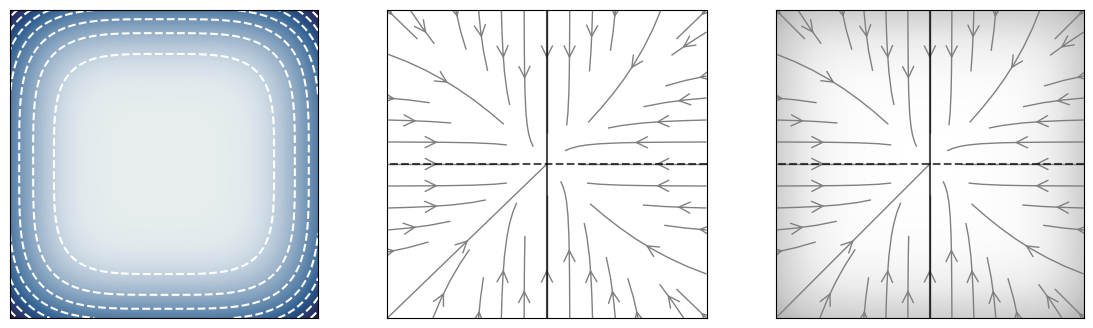

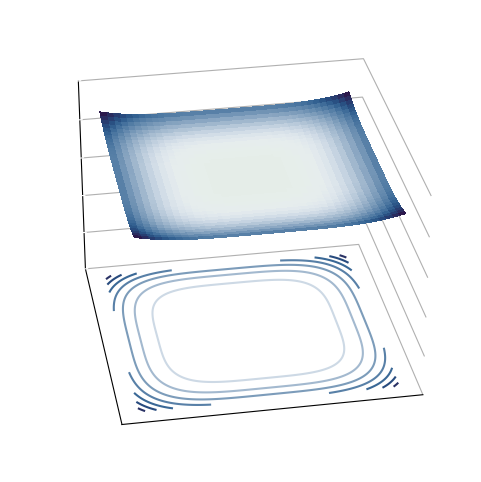

In [187]:
landscape = Landscape([], regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.003)
print(landscape)

L = 3.
npoints = 401
q = np.linspace(-L, L, npoints)
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

figures = visualize_all(landscape, xx,yy,times, color_scheme='fp_types', plot_traj=False)
fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0.01, scatter=False, rot_contour=True, zlim=(-4,1.))